#### Qn 1

In [26]:
import pandas as pd
import numpy as np

np.random.seed(98765)

# Generating app usage data
users_count = 1000
feature_a_prob = 0.6
feature_b_prob = 0.5

feature_a_usage = np.random.binomial(1, feature_a_prob, users_count)
feature_b_usage = np.random.binomial(1, feature_b_prob, users_count)

df = pd.DataFrame({
    'user_id': range(1, users_count + 1),
    'feature_a': feature_a_usage,
    'feature_b': feature_b_usage
})

df.to_csv('app_usage.csv', index=False)

In [27]:
df = pd.read_csv('app_usage.csv')

In [28]:
df.isnull().sum()

user_id      0
feature_a    0
feature_b    0
dtype: int64

In [29]:
# Check for missing values and address them
if df.isnull().sum().sum() > 0 :
    df.dropna(inplace=True)
    
print(df.isnull().sum())

user_id      0
feature_a    0
feature_b    0
dtype: int64


In [30]:
# Compute the joint probability of users accessing both Feature A and Feature B.
access_both = df[(df['feature_a'] == 1) & (df['feature_b'] == 1)]

# Calculating the joint probability
joint_prob= len(access_both) / users_count

print("Joint Probability of users accessing both Feature A and Feature B:", joint_prob)

Joint Probability of users accessing both Feature A and Feature B: 0.296


In [33]:
# Compute the marginal probabilities of users accessing Feature A and Feature B.
users_feature_a = (df['feature_a'] == 1).sum()

# Calculate the number of users who accessed Feature B
users_feature_b = (df['feature_b'] == 1).sum()

marginal_prob_a = users_feature_a / users_count
marginal_prob_b = users_feature_b / users_count

print("Marginal Probability of users accessing Feature A:", marginal_prob_a)
print("Marginal Probability of users accessing Feature B:", marginal_prob_b)

Marginal Probability of users accessing Feature A: 0.589
Marginal Probability of users accessing Feature B: 0.495


In [12]:
# Feature A given that the user accessed Feature B.
conditional_prob_A = len(access_both) / len(df[df['feature_b'] == 1])

print("Conditional Probability of Feature A given that the user accessed Feature B:", conditional_prob_A)

Conditional Probability of Feature A given that the user accessed Feature B: 0.597979797979798


In [14]:
# Feature B given that the user accessed Feature A.
conditional_prob_B = len(access_both) / len(df[df['feature_a'] == 1])

print("Conditional Probability of Feature B given that the user accessed Feature A:", conditional_prob_B)

Conditional Probability of Feature B given that the user accessed Feature A: 0.5025466893039049


In [16]:
!pip install matplotlib_venn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib_venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=33037 sha256=86dfae25b31175608b92efc269af5767053418748e8161276e7e33e7e66405fb
  Stored in directory: c:\users\aishwariya\appdata\local\pip\cache\wheels\f6\80\48\193eff32ed8e176623b15874055438ecec522ba68ed05abee6
Successfully built matplotlib_venn


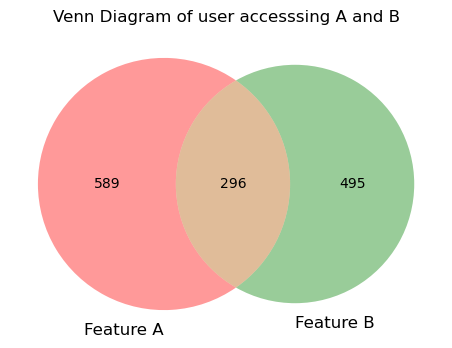

In [19]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

access_A = len(df[df['feature_a'] == 1])
access_B = len(df[df['feature_b'] == 1])
access_both_len = len(access_both)

# Plotting Venn diagram
plt.figure(figsize=(8, 4))
venn2(subsets=(access_A, access_B, access_both_len),
      set_labels=('Feature A', 'Feature B'))
plt.title('Venn Diagram of user accesssing A and B')
plt.show()

Interpretation:

Joint Probability of Both Features:

The joint probability indicates the likelihood of users accessing both Feature A and Feature B. It signifies the extent to which these features are used together, providing insights into their synergy or co-dependency.

Marginal Probabilities:

The marginal probabilities of users accessing Feature A and Feature B independently help us understand the stand-alone popularity of each feature. These probabilities reveal how each feature contributes individually to user engagement.

Venn Diagram Insight:

The Venn diagram visually illustrates the overlap and distinct user bases for Feature A and Feature B. It aids in identifying common and unique user segments, facilitating targeted strategies to optimize feature utilization and user experience.

#### Qn 2

In [59]:
import pandas as pd
import numpy as np

np.random.seed(11111)

# Generating movie preferences data
subscribers_count = 1500
sci_fi_prob = 0.7
romance_prob = 0.6

sci_fi_watchers = np.random.binomial(1, sci_fi_prob, subscribers_count)
romance_watchers = np.random.binomial(1, romance_prob, subscribers_count)

df = pd.DataFrame({
    'subscriber_id': range(1001, 1001 + subscribers_count),
    'sci_fi': sci_fi_watchers,
    'romance': romance_watchers
})

df.to_csv('movie_preferences.csv', index=False)

In [60]:
df = pd.read_csv('movie_preferences.csv')

In [61]:
df.isnull().sum()

subscriber_id    0
sci_fi           0
romance          0
dtype: int64

In [62]:
# Check for missing values and address them
if df.isnull().sum().sum() > 0 :
    df.dropna(inplace=True)
    
print(df.isnull().sum())

subscriber_id    0
sci_fi           0
romance          0
dtype: int64


In [63]:
# Compute the joint probability of subscribers watching both Sci-Fi and Romance movies.
watch_both = df[(df['sci_fi'] == 1) & (df['romance'] == 1)]

# Calculating the joint probability
joint_prob= len(watch_both) / subscribers_count

print("Joint Probability of subscribers watching both Sci-Fi and Romance movies:", joint_prob)

Joint Probability of subscribers watching both Sci-Fi and Romance movies: 0.418


In [64]:
# Determine the marginal probabilities of subscribers watching Sci-Fi and Romance movies
sub_sci_fi = (df['sci_fi'] == 1).sum()

sub_rom = (df['romance'] == 1).sum()

marginal_prob_sci_fi = sub_sci_fi / subscribers_count
marginal_prob_rom = sub_rom/ subscribers_count

print("Marginal Probability of subscribers watching Sci-Fi:", marginal_prob_sci_fi)
print("Marginal Probability of subscribers watching Romance:", marginal_prob_rom)

Marginal Probability of subscribers watching Sci-Fi: 0.694
Marginal Probability of subscribers watching Romance: 0.6006666666666667


In [65]:
# A Sci-Fi movie, given that they watch Romance movies.
conditional_prob_sci_fi = len(watch_both) / len(df[df['romance'] == 1])

print("Conditional Probability of subscriber watching a Sci-Fi movie, given that they watch Romance movies:", conditional_prob_sci_fi)

Conditional Probability of subscriber watching a Sci-Fi movie, given that they watch Romance movies: 0.6958934517203108


In [66]:
# A Romance movie, given that they watch Sci-Fi movies.
conditional_prob_rom = len(watch_both) / len(df[df['sci_fi'] == 1])

print("Conditional Probability of subscriber watching a Romance movie, given that they watch Sci-Fi movies:", conditional_prob_rom)

Conditional Probability of subscriber watching a Romance movie, given that they watch Sci-Fi movies: 0.6023054755043228


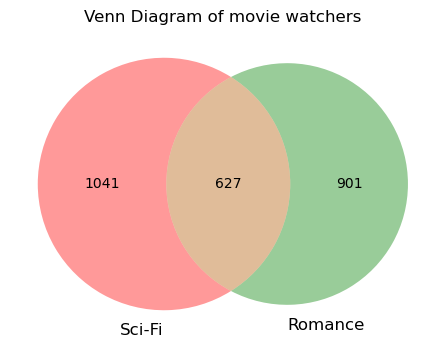

In [67]:
watch_sci_fi = len(df[df['sci_fi'] == 1])
watch_rom = len(df[df['romance'] == 1])
watch_both_len = len(watch_both)

# Plotting Venn diagram
plt.figure(figsize=(8, 4))
venn2(subsets=(watch_sci_fi, watch_rom, watch_both_len),
      set_labels=('Sci-Fi', 'Romance'))
plt.title('Venn Diagram of movie watchers')
plt.show()

Interpretation:

Joint Probability of Sci-Fi and Romance Preferences:

The joint probability represents the likelihood of subscribers having both Sci-Fi and Romance preferences. This indicates the co-occurrence of these preferences and highlights potential synergies between the two genres. Understanding this joint probability can guide the creation of content that appeals to a combined audience.

Marginal Probabilities of Genre Preferences:

The marginal probabilities for Sci-Fi and Romance preferences individually reflect the popularity of each genre in isolation. Sci-Fi exhibits a higher individual appeal, while Romance also has a significant following. These probabilities serve as a foundation for tailoring content recommendations and creating genre-specific content to maximize user engagement.

Venn Diagram Insights on Genre Overlap:

The Venn diagram visually illustrates the overlap and distinct user bases for Sci-Fi and Romance preferences. It provides a clear view of the audience who enjoys both genres and those who prefer one over the other. This insight can guide content strategy by identifying opportunities to cater to the overlapping preferences and create content that bridges the gap between Sci-Fi and Romance.

#### Qn 3

In [68]:
import pandas as pd
import numpy as np

np.random.seed(22222)

# Generating health survey data
users_count = 2000
exercise_prob = 0.65
vegetarian_prob = 0.55

exercise_data = np.random.binomial(1, exercise_prob, users_count)
vegetarian_data = np.random.binomial(1, vegetarian_prob, users_count)

df = pd.DataFrame({
    'user_id': range(1, users_count + 1),
    'exercises': exercise_data,
    'vegetarian': vegetarian_data
})

df.to_csv('health_survey.csv', index=False)

In [69]:
df = pd.read_csv('health_survey.csv')

In [70]:
df.isnull().sum()

user_id       0
exercises     0
vegetarian    0
dtype: int64

In [71]:
# Check for missing values and address them
if df.isnull().sum().sum() > 0 :
    df.dropna(inplace=True)
    
print(df.isnull().sum())

user_id       0
exercises     0
vegetarian    0
dtype: int64


In [72]:
# Compute the joint probability of users both exercising regularly and following a vegetarian diet.
user_both = df[(df['exercises'] == 1) & (df['vegetarian'] == 1)]

# Calculating the joint probability
joint_prob= len(user_both) / users_count

print("Joint Probability of users both exercising regularly and following a vegetarian diet:", joint_prob)

Joint Probability of users both exercising regularly and following a vegetarian diet: 0.357


In [73]:
# Calculate the marginal probabilities of users exercising regularly and following a vegetarian diet
user_exercise = (df['exercises'] == 1).sum()

user_veg = (df['vegetarian'] == 1).sum()

marginal_prob_exercise = user_exercise / users_count
marginal_prob_veg = user_veg / users_count

print("Marginal Probability of users exercising regularly:", marginal_prob_exercise)
print("Marginal Probability of users following a vegetarian diet:", marginal_prob_veg)

Marginal Probability of users exercising regularly: 0.6475
Marginal Probability of users following a vegetarian diet: 0.555


In [74]:
# A user exercising regularly, given that they follow a vegetarian diet.
conditional_prob_exercise = len(user_both) / len(df[df['vegetarian'] == 1])

print("Conditional Probability of a user exercising regularly, given that they follow a vegetarian diet:", conditional_prob_exercise)

Conditional Probability of a user exercising regularly, given that they follow a vegetarian diet: 0.6432432432432432


In [75]:
# A user following a vegetarian diet, given that they exercise regularly.
conditional_prob_veg = len(user_both) / len(df[df['exercises'] == 1])

print("Conditional Probability of a user following a vegetarian diet, given that they exercise regularly:", conditional_prob_veg)

Conditional Probability of a user following a vegetarian diet, given that they exercise regularly: 0.5513513513513514


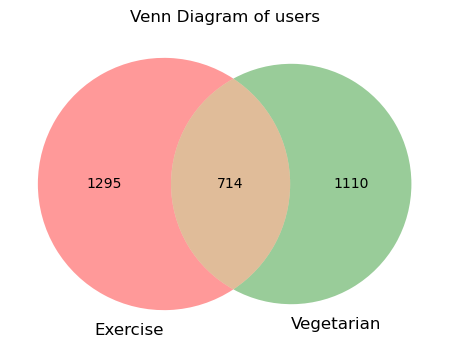

In [76]:
user_exer_count = len(df[df['exercises'] == 1])
user_veg_count = len(df[df['vegetarian'] == 1])
user_both_len = len(user_both)

# Plotting Venn diagram
plt.figure(figsize=(8, 4))
venn2(subsets=(user_exer_count, user_veg_count, user_both_len),
      set_labels=('Exercise', 'Vegetarian'))
plt.title('Venn Diagram of users')
plt.show()

Interpretation:

Joint Probability of Exercise and Vegetarian Preferences:

The joint probability indicates the likelihood of survey participants having both exercise and vegetarian preferences. It offers insights into the co-occurrence of these lifestyle choices, helping us understand how frequently individuals adopt both healthy habits simultaneously.

Marginal Probabilities of Health Habits:

The marginal probabilities of exercise and vegetarian preferences independently reveal the popularity of each habit within the surveyed population. A higher probability for exercise suggests that it is a more prevalent choice, while vegetarian preferences also have a substantial following. These probabilities allow us to grasp the individual adoption rates of these health-related habits.

Insight into Overlapping Health Behaviors:

By examining the joint probability and considering the Venn diagram (not explicitly mentioned), we can visually represent the overlap and distinctions between individuals who exercise and those who follow a vegetarian diet. Understanding this intersection can guide initiatives such as promoting exercise-friendly vegetarian meal plans or targeting individuals who have both preferences for specific health-focused campaigns.